In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#extra code - the exact arguments of make_blobs() are not important
blob_centers = np.array([[0.2, 2.3], [-1.6, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples = 2000, centers = blob_centers, cluster_std = blob_std, random_state=7)

k = 5
kmeans = KMeans(n_clusters = k, n_init = 10, random_state=7)       # n_init baslama sayidir. 10 defe ferqli qiymetlerle bashlayacaq
y_pred = kmeans.fit_predict(X)

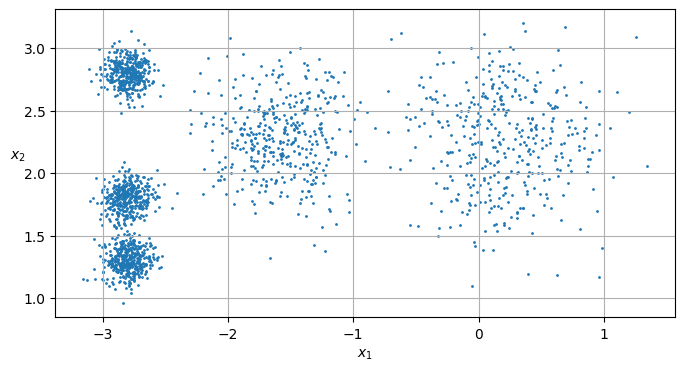

In [5]:
def plot_clusters(X, y = None):
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation = 0)

plt.figure(figsize = (8,4))
plot_clusters(X)
plt.grid()
plt.show();

In [6]:
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [7]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [8]:
y_pred is kmeans.labels_

True

In [9]:
# central coordinates
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20845259,  2.25564354],
       [-2.78607039,  2.79514817],
       [-1.55686265,  2.28114151],
       [-2.8028651 ,  1.80176432]])

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [11]:
X_new.shape, X.shape        #sutun saylari beraber olmalidir

((4, 2), (2000, 2))

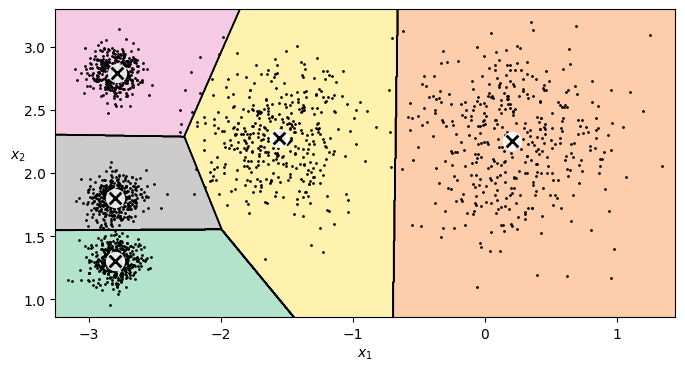

In [12]:
def plot_data(X):
   plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
   if weights is not None:
       centroids = centroids[weights > weights.max() / 10]
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
   mins = X.min(axis=0) - 0.1
   maxs = X.max(axis=0) + 0.1
   xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
   Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)


   plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
   plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
   plot_data(X)
   if show_centroids:
       plot_centroids(clusterer.cluster_centers_)


   if show_xlabels:
       plt.xlabel("$x_1$")
   else:
       plt.tick_params(labelbottom=False)
   if show_ylabels:
       plt.ylabel("$x_2$", rotation=0)
   else:
       plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [13]:
kmeans.transform(X_new).round(2)      #yeni yaratdigimiz datasetin her bir klaster meerkezinden mesafesine baxir    4 datanin 5 cluster centere mesafesi   #yeni yaratdigim dataset her bir kluster merkezinden mesafaesine kecir, 4 data (row) 5 cluster center-e mesafesini

array([[2.89, 0.33, 2.9 , 1.58, 2.81],
       [5.84, 2.8 , 5.84, 4.57, 5.81],
       [1.71, 3.29, 0.3 , 1.61, 1.21],
       [1.22, 3.22, 0.36, 1.46, 0.73]])

In [14]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1, random_state = 42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

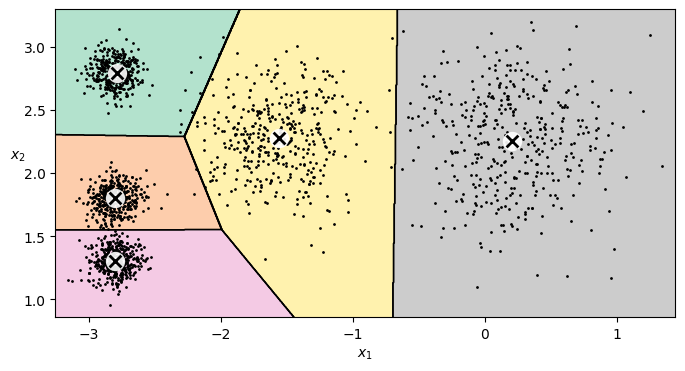

In [15]:
plt.figure(figsize = (8, 4))
plot_decision_boundaries(kmeans, X)

In [16]:
kmeans.inertia_         # her bir noqtenin klaster merkezlerinden mesafesinin ceminin ortalamasi

211.29488832043148

In [17]:
kmeans.score(X)         # - alinir, cunki daha boyuk score daha yaxsidi, burda da mesafe oldugundan 0-a yaxinlasmaga calisir

-211.29488832043148

In [18]:
kmeans_rnd_10_inits = KMeans(n_clusters = 5, init = 'random', n_init = 10, random_state=42)

kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

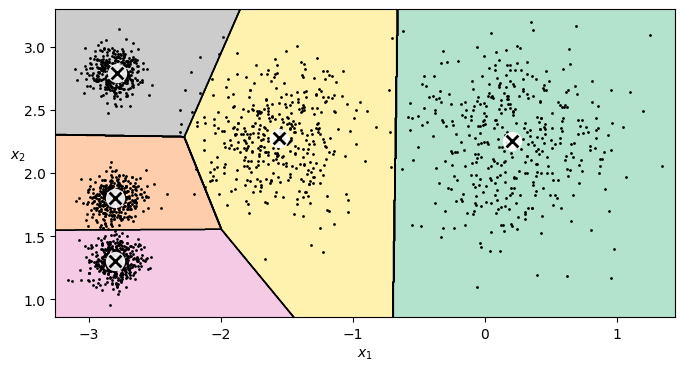

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show();

In [20]:
kmeans_rnd_10_inits.inertia_

211.2931041526368

#formalar oval kimi olanda k-means yaxsi netice vermir

#Mini-Batch K-Means

In [21]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, n_init = 3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [22]:
#Yaxsi terefleri ondadi ki, daha az data uzerinde isleyir, amma bu accurancy biraz asagi salir ve cox daha suretlidir

In [23]:
minibatch_kmeans.inertia_

211.34550521201544

In [24]:
kmeans_k3 = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
kmeans_k8 = KMeans(n_clusters = 8, n_init = 10, random_state = 42)

#plot_clusterer_comparison(kmeans_k3, kmeans_k8, "$k=8$")
plt.show()

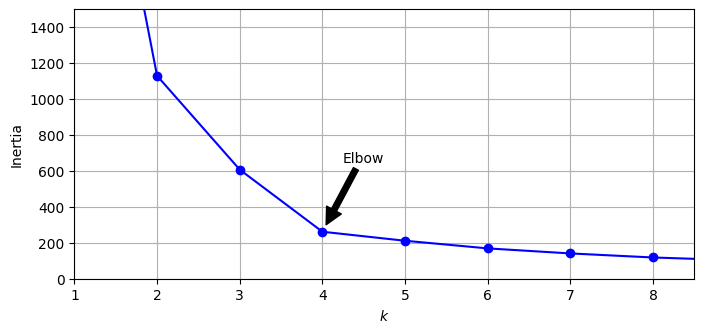

In [25]:
kmeans_per_k = [KMeans(n_clusters= k , n_init=10, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy = (4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink = 0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment = 'center')
plt.axis([1, 8.5, 0, 1500])
plt.grid()
plt.show()

#Limits of K-Means

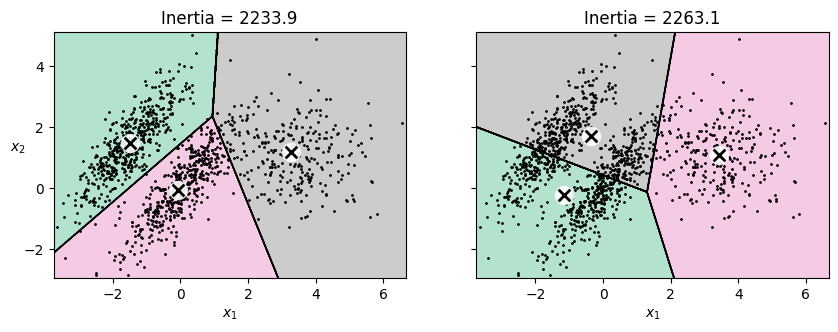

In [26]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4),(0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.347, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]             # r_ --> arraylari concat edir

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

plt.show()

In [27]:
import PIL

image = np.asarray(PIL.Image.open("/content/ladybug.png"))
image.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/ladybug.png'

In [28]:
image

NameError: name 'image' is not defined

In [29]:
X = image.reshape(-1 ,3)      # 3 channel (RGB)

NameError: name 'image' is not defined

In [30]:
kmeans = KMeans(n_clusters = 8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

NameError: name 'image' is not defined

In [ ]:
X

array([[25, 29,  2],
       [24, 28,  1],
       [24, 29,  0],
       ...,
       [10, 58,  0],
       [ 5, 52,  0],
       [ 2, 48,  0]], dtype=uint8)

In [ ]:
segmented_img

array([[[ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        ...,
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629]],

       [[ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        ...,
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629]],

       [[ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        ...,
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629]],

       ...,

       [[ 5.6105612 , 27.61743918,  1.44857047],
        [ 5

In [ ]:
kmeans.cluster_centers_

array([[  5.6105612 ,  27.61743918,   1.44857047],
       [250.68280046, 237.8319458 ,   6.51237711],
       [ 54.37997208,  97.09151272,  14.07131629],
       [155.1122467 , 160.29920705,  98.37997063],
       [ 93.53208815, 132.47927103,  39.06947451],
       [ 24.39502109,  63.41611633,   4.09118396],
       [195.12454743,  50.81607531,  11.20057929],
       [223.40683449, 182.94424185,   9.39848253]])

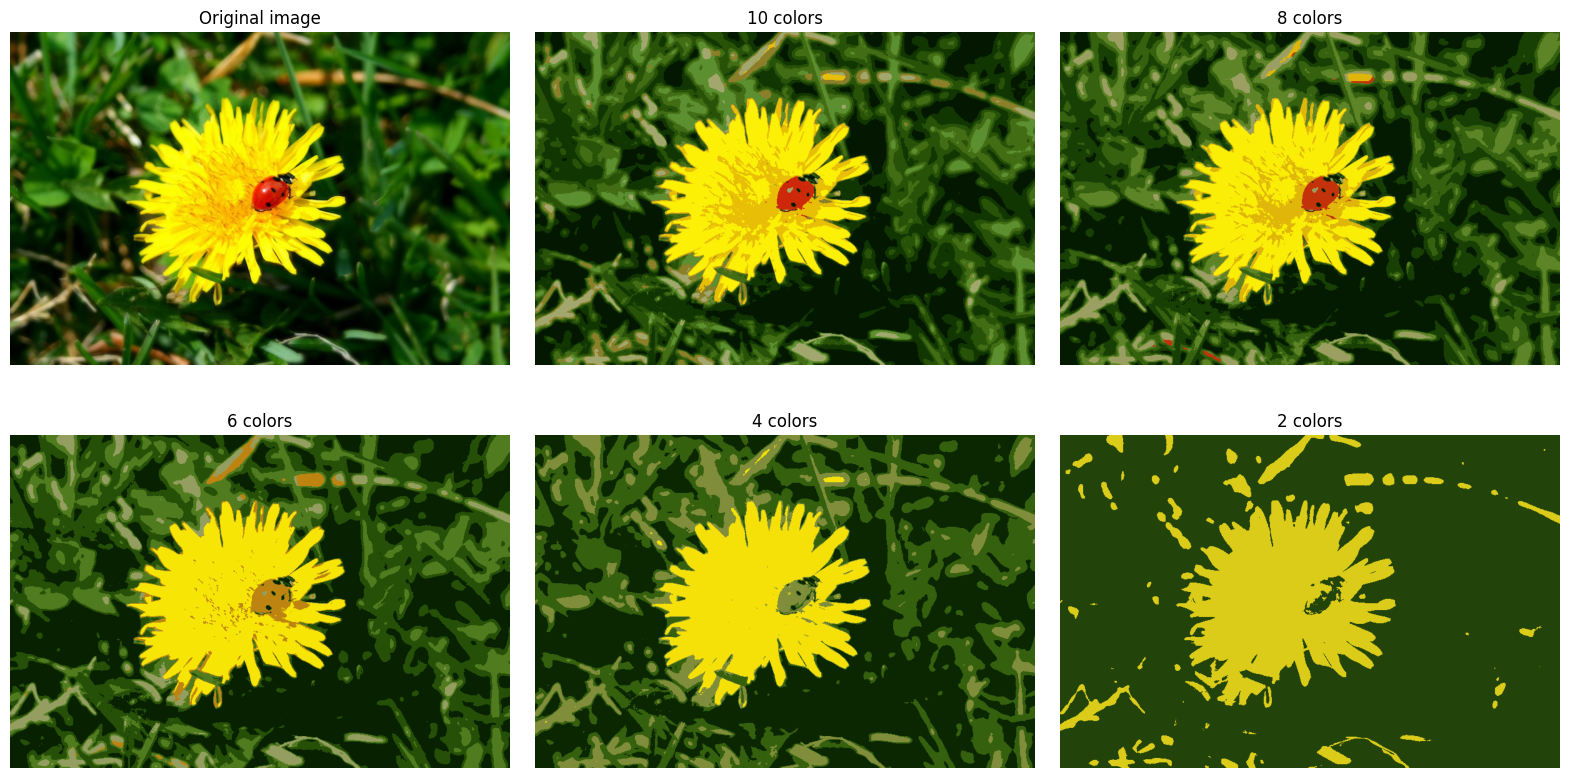

In [ ]:
segmented_imgs = []

n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state=42).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.05, hspace = 0.1)


plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
  plt.subplot(2, 3, 2 + idx)
  plt.imshow(segmented_imgs[idx] / 255)
  plt.title(f"{n_clusters} colors")
  plt.axis('off')

plt.show()

In [ ]:
from sklearn.datsets import fetch_olivetti_faces

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
olivetti_faces = fetch_olivetti_faces()

In [ ]:
olivetti_faces.target

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit  #datanı təsadüfi şəkildə bölərək siniflər arasındakı paylanmanı qoruyur

In [ ]:
# test datasetin ayrılması
strf_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strf_split.split(olivetti_faces.data, olivetti_faces.target))
X_train_valid = olivetti_faces.data[train_valid_idx]
y_train_valid = olivetti_faces.target[train_valid_idx]
X_test = olivetti_faces.data[test_idx]
y_test = olivetti_faces.target[test_idx]

In [ ]:
# train və validation datasetlərinə ayrılma
strf_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strf_split.split(X_train_valid, y_train_valid))

In [ ]:
# indekslərə əsasən bölmə
X_train, y_train = X_train_valid[train_idx], y_train_valid[train_idx]
X_valid, y_valid = X_train_valid[valid_idx], y_train_valid[valid_idx]

In [ ]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

In [ ]:
# PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.99)

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [ ]:
pca.n_components_

In [ ]:
# Apply K-Means Clustering

In [ ]:
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_pca) for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]
best_index = np.argmin(inertias)  # ən aşağı inertia olan indeks
best_k = list(k_range)[best_index]  # ən yaxşı K dəyəri
best_inertia = inertias[best_index]  # ən yaxşı inertia dəyəri

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, 'bo-', label="Inertia")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, 'rs', label=f"Elbow Point (k={best_k})")
plt.annotate("", xy=(best_k, best_inertia), xytext=(best_k + 5, best_inertia + 100), arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(best_k + 5, best_inertia + 100, "Elbow", horizontalalignment="center")

plt.grid()
plt.legend()
plt.show();

In [ ]:
best_model = kmeans_per_k[best_index]

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

#Clustering using Semi-supervised learning

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [ ]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) #fit eden mesafeleri yoxlayir
representative_digit_idx = X_digits_dist.argmin(axis=0) # en az mesafe olan 50 merkeze yaxin noqteni gosterir
X_representative_digits = X_train[representative_digit_idx]

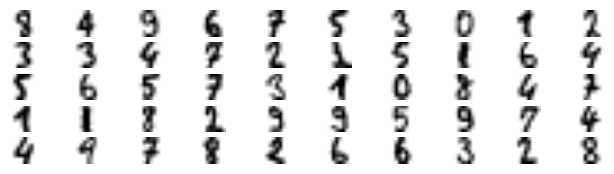

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis("off")

plt.show();

In [ ]:
y_representative_digits = np.array([
    8,4,9,6,7,5,3,0,1,2,
    3,3,4,7,2,1,5,1,6,4,
    5,6,5,7,3,1,0,8,4,7,
    1,1,8,2,9,9,5,9,7,4,
    4,9,7,8,2,6,6,3,2,8
])

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8387909319899244

In [ ]:
log_reg.score(X_train, y_train)

0.9364285714285714

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [ ]:
y_representative_digits

array([8, 4, 9, 6, 7, 5, 3, 0, 1, 2, 3, 3, 4, 7, 2, 1, 5, 1, 6, 4, 5, 6,
       5, 7, 3, 1, 0, 8, 4, 7, 1, 1, 8, 2, 9, 9, 5, 9, 7, 4, 4, 9, 7, 8,
       2, 6, 6, 3, 2, 8])

In [ ]:
kmeans.labels_

array([ 7, 31, 44, ..., 40, 40, 23], dtype=int32)

In [ ]:
log_reg = LogisticRegression(max_iter=10_00)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=1000)

In [ ]:
log_reg.score(X_test, y_test)

0.8589420654911839

In [ ]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [ ]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8564231738035264

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9548148148148148

In [ ]:
# np.percentile is good to find anomalities

#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
# eps boyuk olanda daha genish etrafa baxir

In [ ]:
# min_samples o demekdir ki bir datanin etrafinda en az neche noqte olsa onu merkez kimi goturur ve DBSCAN boyuk olculu datalarda
# effektiv deyil

In [ ]:
dbscan.labels_[:10] #-1ler anomalitylerdi

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10] #indexlerdi, amma burda anomalities yoxdu

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_ #indices-in hansi koordinatlarda yerlesdiyi gorunur

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

#Gaussian Mixtures

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
gm.weights_ # her bur merkez noqtesine gore dushme ehtimalidir

array([0.40005972, 0.20961444, 0.39032584])

In [ ]:
gm.means_ #merkezlerin koordinatidir

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [ ]:
gm.covariances_ #yayilmasi (sigma)

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [ ]:
gm.n_iter_ #neche defe run olub

4

In [ ]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [ ]:
gm.predict_proba(X).round(3) #neche faiz duhunursenki hemin merkeze aiddi

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

In [ ]:
# Active learning - en ehemiyyetli oldugunu dusunduyumuz datalari labelleyirik
# meselen modelin en az emin oldugu instancelar uzerinde labeling ede bilerik en pis oldugu klass uzre labeling ede bilerik

In [ ]:
X_new, y_new = gm.sample(6) #suni data yaradiriq
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [ ]:
y_new

array([0, 0, 1, 1, 1, 2])

#Hands-On Projects

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [ ]:
faces = fetch_olivetti_faces(shuffle=True)
X = faces.data
y = faces.target

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify = y_temp, random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_valid.shape

In [ ]:
X_test.shape

In [ ]:
sse = []
silhouette_scores = []
k_values = range(10,50)

In [ ]:
def plot_clusters(X, y = None):
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation = 0)

plt.figure(figsize = (8,4))
plot_clusters(X)
plt.grid()
plt.show()

In [ ]:
k = 23
kmeans = KMeans(n_clusters = k, random_state=42, n_init = 10)
labels = kmeans.fit_predict(X_train)

In [ ]:
labels

In [ ]:
kmeans.labels_

In [ ]:
labels is kmeans.labels_

In [ ]:
kmeans.cluster_centers_

In [ ]:
X.shape

In [ ]:
kmeans

In [ ]:
from sklearn.metrics import silhouette_score

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)  # Elbow method üçün inertia
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

In [ ]:
def plot_faces(images, titles, h=64, w=64, n_row=5, n_col=5):
    plt.figure(figsize=(2 * n_col, 2.5 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.show()

In [ ]:
cluster_titles = [f"Cluster {labels[i]}" for i in range(25)]
plot_faces(X_train[:25], cluster_titles)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# 1️⃣ Üzləri klasterlərə görə qruplaşdırırıq
cluster_dict = defaultdict(list)
for img, label in zip(X_train, labels):
    cluster_dict[label].append(img)

# 2️⃣ Hər klasterdən 5 şəkil seçirik (əgər varsa)
selected_images = []
selected_titles = []
n_samples_per_cluster = 5  # Hər klasterdən neçə üz göstərilsin

# Hər klaster üzrə müəyyən sayda şəkil seçirik
for cluster_id, images in cluster_dict.items():
    selected_images.extend(images[:n_samples_per_cluster])  # İlk 5 şəkli seçirik
    selected_titles.extend([f"Cluster {cluster_id}"] * min(len(images), n_samples_per_cluster))

# 3 Vizuallaşdırma funksiyası
def plot_faces(images, titles, h=64, w=64, n_row=k, n_col=n_samples_per_cluster):
    plt.figure(figsize=(2 * n_col, 2.5 * n_row))
    for i in range(len(images)):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.show()

# 4️⃣ Nəticələri vizuallaşdırırıq
# Nəzərə alırıq ki, hər klasterdən 5 şəkil götürürük və bununla bütün klasterləri vizuallaşdırırıq
plot_faces(selected_images, selected_titles)